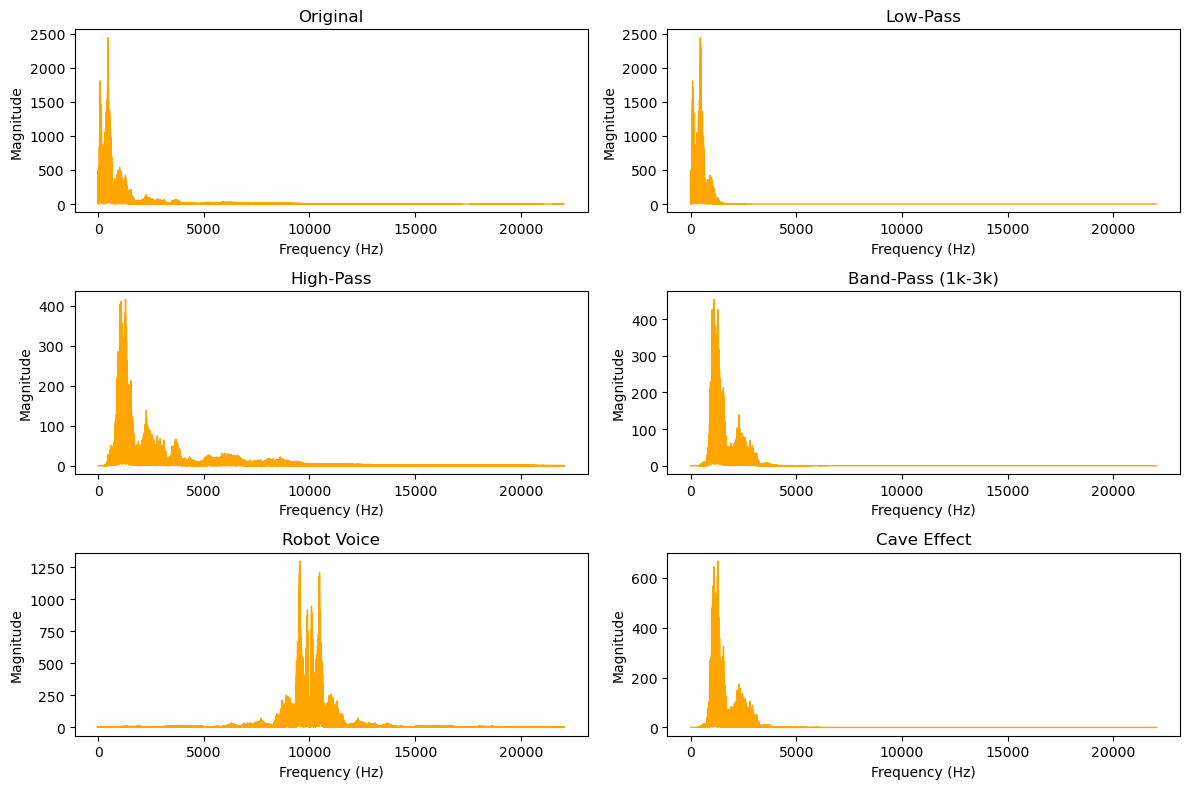

All extended exercises have been completed. Processed audio files:
 - lowpass.wav
 - highpass.wav
 - bandpass.wav
 - robot_voice.wav
 - cave_effect.wav


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy.signal import butter, lfilter

##############################################################################
# 1. READ AUDIO AND INITIAL SETUP
##############################################################################
# Replace "welcome.wav" with the path to your desired file
input_wav = r"E:\SOICT-HUST ICT Program\Signal Processing\LAB\welcome.wav"
sample_rate, x = wav.read(input_wav)

# Convert to float in range [-1, 1] if the data is integer
if not np.issubdtype(x.dtype, np.floating):
    max_val = np.iinfo(x.dtype).max
    x = x.astype(np.float32) / max_val

# Separate stereo channels for stereo files
if x.ndim == 2:
    left, right = x[:, 0], x[:, 1]
else:
    left, right = x, x  # if mono, duplicate

time = np.arange(len(left)) / sample_rate


##############################################################################
# 2. HELPER FUNCTIONS (FILTERS, ECHO)
##############################################################################
def butter_filter(data, cutoff, fs, order=6, btype='low'):
    """
    Creates a Butterworth filter of specified order and type,
    and applies it to the data.
    """
    nyquist = 0.5 * fs
    norm_cutoff = cutoff / nyquist
    b, a = butter(order, norm_cutoff, btype=btype)
    return lfilter(b, a, data)

def butter_bandpass(data, lowcut, highcut, fs, order=6):
    """
    Creates a bandpass filter (Butterworth) and applies it to the data.
    """
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, data)

def apply_echo(data, fs, delay_s=0.3, attenuation=0.6):
    """
    Adds echo effect to a 1D signal by delaying and attenuating.
    """
    delay_samples = int(delay_s * fs)
    data_echo = np.copy(data)
    if delay_samples < len(data_echo):
        data_echo[delay_samples:] += attenuation * data[:(-delay_samples)]
    return data_echo

def save_stereo_wave(data_left, data_right, fs, filename):
    """
    Stacks left/right channels and saves as a .wav.
    """
    stereo_data = np.column_stack((data_left, data_right))
    wav.write(filename, fs, stereo_data.astype(np.float32))

def compute_spectrum(data, fs):
    """
    Computes a one-sided magnitude spectrum for a given signal.
    Returns frequencies (Hz) and magnitude.
    """
    fft_data = np.fft.fft(data)
    half_len = len(fft_data) // 2
    freqs = np.fft.fftfreq(len(data), 1/fs)[:half_len]
    mag = np.abs(fft_data[:half_len])
    return freqs, mag


##############################################################################
# 3. LOW-PASS AND HIGH-PASS FILTERS (Compare with Original)
##############################################################################
# Low-pass filter: fc = 1000 Hz
lp_cutoff = 1000.0
lp_left = butter_filter(left, lp_cutoff, sample_rate, btype='low')
lp_right = butter_filter(right, lp_cutoff, sample_rate, btype='low')

# High-pass filter: fc = 1000 Hz
hp_cutoff = 1000.0
hp_left = butter_filter(left, hp_cutoff, sample_rate, btype='high')
hp_right = butter_filter(right, hp_cutoff, sample_rate, btype='high')

# Save results
save_stereo_wave(lp_left, lp_right, sample_rate, r"E:\SOICT-HUST ICT Program\Signal Processing\LAB\lowpass.wav")
save_stereo_wave(hp_left, hp_right, sample_rate, r"E:\SOICT-HUST ICT Program\Signal Processing\LAB\highpass.wav")


##############################################################################
# 4. BANDPASS FILTER (1000–3000 Hz)
##############################################################################
bp_left = butter_bandpass(left, 1000.0, 3000.0, sample_rate)
bp_right = butter_bandpass(right, 1000.0, 3000.0, sample_rate)
save_stereo_wave(bp_left, bp_right, sample_rate, r"E:\SOICT-HUST ICT Program\Signal Processing\LAB\bandpass.wav")


##############################################################################
# 5. ROBOT VOICE EFFECT (Multiply by a high-frequency sine wave)
##############################################################################
robot_freq = 10000  # e.g. 10 kHz
mod_signal = np.sin(2 * np.pi * robot_freq * time)
robot_left = left * mod_signal
robot_right = right * mod_signal
save_stereo_wave(robot_left, robot_right, sample_rate, r"E:\SOICT-HUST ICT Program\Signal Processing\LAB\robot_voice.wav")


##############################################################################
# 6. "CAVE" EFFECT (Echo + Optional Filter)
##############################################################################
echo_left = apply_echo(left, sample_rate, delay_s=0.3, attenuation=0.6)
echo_right = apply_echo(right, sample_rate, delay_s=0.3, attenuation=0.6)

# Optionally, apply the bandpass to the echoed signal for a "cave" feel
cave_left = butter_bandpass(echo_left, 1000.0, 3000.0, sample_rate)
cave_right = butter_bandpass(echo_right, 1000.0, 3000.0, sample_rate)
save_stereo_wave(cave_left, cave_right, sample_rate, r"E:\SOICT-HUST ICT Program\Signal Processing\LAB\cave_effect.wav")


##############################################################################
# 7. PLOT SPECTRA FOR COMPARISON
##############################################################################
# We'll plot the left channel only, for clarity

signals = {
    "Original": left,
    "Low-Pass": lp_left,
    "High-Pass": hp_left,
    "Band-Pass (1k-3k)": bp_left,
    "Robot Voice": robot_left,
    "Cave Effect": cave_left,
}

plt.figure(figsize=(12, 8))

for i, (label, data) in enumerate(signals.items(), start=1):
    freqs, mag = compute_spectrum(data, sample_rate)
    plt.subplot(3, 2, i)  # 3 rows, 2 cols
    plt.plot(freqs, mag, color="orange", linewidth=1)
    plt.title(label)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

print("All extended exercises have been completed. Processed audio files:")
print(" - lowpass.wav")
print(" - highpass.wav")
print(" - bandpass.wav")
print(" - robot_voice.wav")
print(" - cave_effect.wav")
